In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:27,  4.32it/s]                                                                                               


Epoch 1 of 100
Generator loss: 1.17491691, Discriminator loss: 0.96894353


118it [00:30,  3.90it/s]                                                                                               


Epoch 2 of 100
Generator loss: 1.54345164, Discriminator loss: 1.11902655


118it [00:30,  3.91it/s]                                                                                               


Epoch 3 of 100
Generator loss: 2.86832187, Discriminator loss: 1.14157265


118it [00:28,  4.10it/s]                                                                                               


Epoch 4 of 100
Generator loss: 2.72302412, Discriminator loss: 1.18402287


118it [00:28,  4.13it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


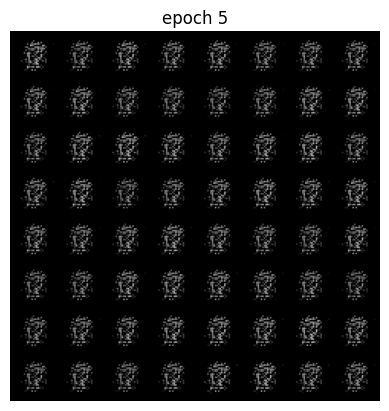

Epoch 5 of 100
Generator loss: 1.71292613, Discriminator loss: 1.04133779


118it [00:29,  4.01it/s]                                                                                               


Epoch 6 of 100
Generator loss: 1.71220198, Discriminator loss: 1.05462698


118it [00:29,  3.95it/s]                                                                                               


Epoch 7 of 100
Generator loss: 3.59557501, Discriminator loss: 1.07771516


118it [00:28,  4.10it/s]                                                                                               


Epoch 8 of 100
Generator loss: 2.53223236, Discriminator loss: 0.91738263


118it [00:28,  4.08it/s]                                                                                               


Epoch 9 of 100
Generator loss: 1.08876732, Discriminator loss: 1.29557380


118it [00:29,  4.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


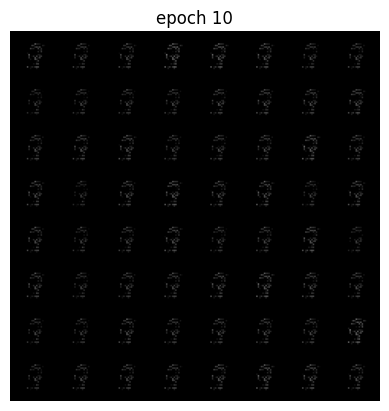

Epoch 10 of 100
Generator loss: 1.17146088, Discriminator loss: 1.04350058


118it [00:28,  4.07it/s]                                                                                               


Epoch 11 of 100
Generator loss: 1.38769611, Discriminator loss: 1.12399021


118it [00:28,  4.10it/s]                                                                                               


Epoch 12 of 100
Generator loss: 4.53507128, Discriminator loss: 0.95308500


118it [00:30,  3.91it/s]                                                                                               


Epoch 13 of 100
Generator loss: 2.36300028, Discriminator loss: 0.80043192


118it [00:30,  3.93it/s]                                                                                               


Epoch 14 of 100
Generator loss: 2.01871671, Discriminator loss: 0.87349716


118it [00:29,  3.95it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


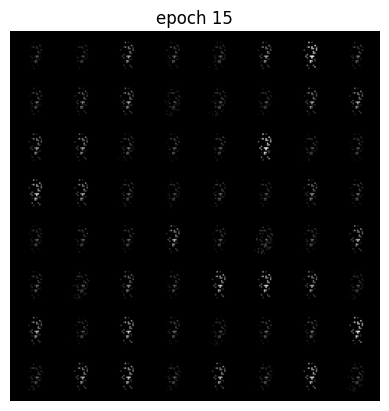

Epoch 15 of 100
Generator loss: 1.96963149, Discriminator loss: 0.84090197


118it [00:30,  3.85it/s]                                                                                               


Epoch 16 of 100
Generator loss: 2.23614196, Discriminator loss: 0.76320279


118it [00:30,  3.87it/s]                                                                                               


Epoch 17 of 100
Generator loss: 1.96347764, Discriminator loss: 0.98171240


118it [00:29,  4.00it/s]                                                                                               


Epoch 18 of 100
Generator loss: 1.75487043, Discriminator loss: 0.92693414


118it [00:28,  4.17it/s]                                                                                               


Epoch 19 of 100
Generator loss: 2.41688710, Discriminator loss: 0.61347667


118it [00:27,  4.22it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


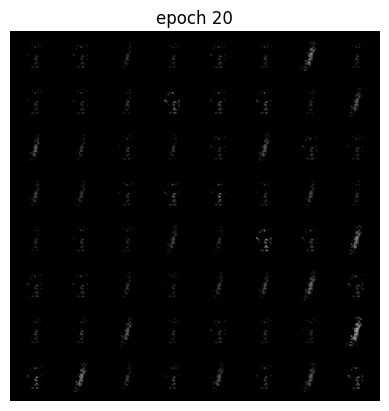

Epoch 20 of 100
Generator loss: 3.14924304, Discriminator loss: 0.42534585


118it [00:28,  4.08it/s]                                                                                               


Epoch 21 of 100
Generator loss: 3.35937851, Discriminator loss: 0.48900063


118it [00:29,  4.01it/s]                                                                                               


Epoch 22 of 100
Generator loss: 3.41532182, Discriminator loss: 0.48351553


118it [00:28,  4.18it/s]                                                                                               


Epoch 23 of 100
Generator loss: 2.99811459, Discriminator loss: 0.48949160


118it [00:29,  4.01it/s]                                                                                               


Epoch 24 of 100
Generator loss: 3.11118220, Discriminator loss: 0.41447377


118it [00:29,  3.98it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


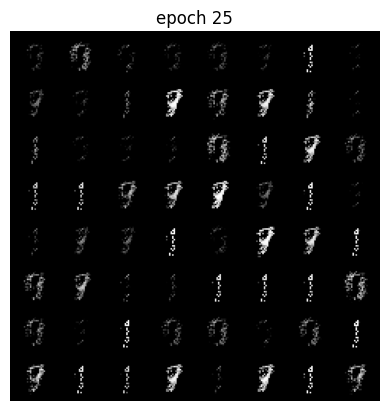

Epoch 25 of 100
Generator loss: 3.35677285, Discriminator loss: 0.47638435


118it [00:29,  3.98it/s]                                                                                               


Epoch 26 of 100
Generator loss: 3.36157572, Discriminator loss: 0.44050636


118it [00:29,  4.01it/s]                                                                                               


Epoch 27 of 100
Generator loss: 2.98139361, Discriminator loss: 0.48594833


118it [00:29,  4.00it/s]                                                                                               


Epoch 28 of 100
Generator loss: 2.88145296, Discriminator loss: 0.52282132


118it [00:29,  3.98it/s]                                                                                               


Epoch 29 of 100
Generator loss: 2.87783176, Discriminator loss: 0.54260760


118it [00:30,  3.91it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


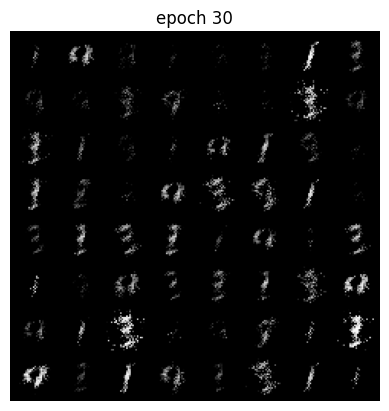

Epoch 30 of 100
Generator loss: 3.23562173, Discriminator loss: 0.47047423


118it [00:30,  3.91it/s]                                                                                               


Epoch 31 of 100
Generator loss: 2.56609297, Discriminator loss: 0.62469856


118it [00:29,  3.94it/s]                                                                                               


Epoch 32 of 100
Generator loss: 2.75304086, Discriminator loss: 0.57954328


118it [00:29,  4.00it/s]                                                                                               


Epoch 33 of 100
Generator loss: 2.60232683, Discriminator loss: 0.53076123


118it [00:29,  3.98it/s]                                                                                               


Epoch 34 of 100
Generator loss: 2.87744031, Discriminator loss: 0.45753957


118it [00:29,  4.03it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


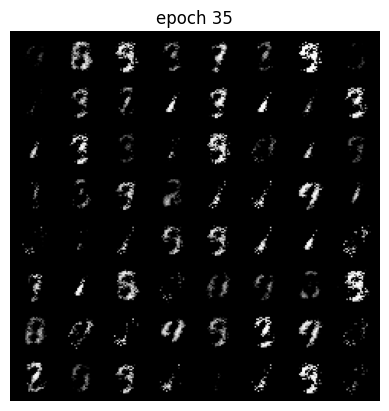

Epoch 35 of 100
Generator loss: 2.49279736, Discriminator loss: 0.68707417


118it [00:29,  4.04it/s]                                                                                               


Epoch 36 of 100
Generator loss: 2.77282656, Discriminator loss: 0.46943063


118it [00:29,  3.95it/s]                                                                                               


Epoch 37 of 100
Generator loss: 2.95826385, Discriminator loss: 0.46045909


118it [00:29,  4.06it/s]                                                                                               


Epoch 38 of 100
Generator loss: 2.89414014, Discriminator loss: 0.48408725


118it [00:30,  3.92it/s]                                                                                               


Epoch 39 of 100
Generator loss: 3.04362620, Discriminator loss: 0.47945624


118it [00:29,  3.95it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


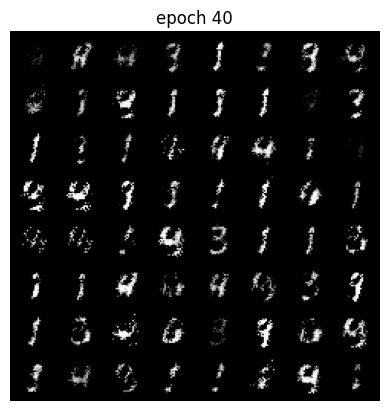

Epoch 40 of 100
Generator loss: 2.84426967, Discriminator loss: 0.55751639


118it [00:29,  3.97it/s]                                                                                               


Epoch 41 of 100
Generator loss: 3.12311602, Discriminator loss: 0.46578360


118it [00:29,  4.06it/s]                                                                                               


Epoch 42 of 100
Generator loss: 2.59250930, Discriminator loss: 0.58079929


118it [00:28,  4.10it/s]                                                                                               


Epoch 43 of 100
Generator loss: 2.60023290, Discriminator loss: 0.58798849


118it [00:29,  4.05it/s]                                                                                               


Epoch 44 of 100
Generator loss: 2.50365694, Discriminator loss: 0.58795553


118it [00:29,  3.99it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


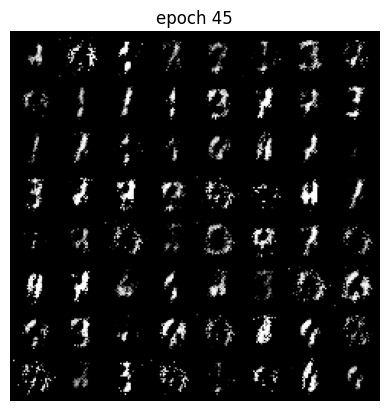

Epoch 45 of 100
Generator loss: 2.56767059, Discriminator loss: 0.58027964


118it [00:29,  4.06it/s]                                                                                               


Epoch 46 of 100
Generator loss: 2.77026383, Discriminator loss: 0.51533588


118it [00:28,  4.10it/s]                                                                                               


Epoch 47 of 100
Generator loss: 2.99065988, Discriminator loss: 0.54475109


118it [00:29,  3.95it/s]                                                                                               


Epoch 48 of 100
Generator loss: 2.90090033, Discriminator loss: 0.54924078


118it [00:30,  3.83it/s]                                                                                               


Epoch 49 of 100
Generator loss: 2.55431370, Discriminator loss: 0.60736290


118it [00:29,  3.95it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


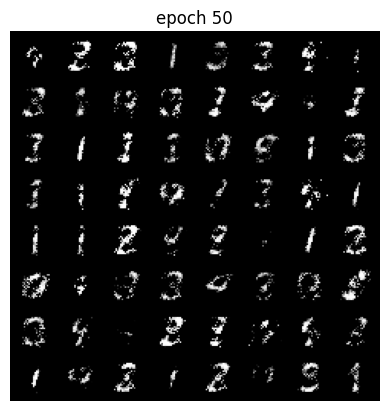

Epoch 50 of 100
Generator loss: 2.90472327, Discriminator loss: 0.57625657


118it [00:30,  3.86it/s]                                                                                               


Epoch 51 of 100
Generator loss: 2.68749375, Discriminator loss: 0.58342172


118it [00:30,  3.88it/s]                                                                                               


Epoch 52 of 100
Generator loss: 3.03810928, Discriminator loss: 0.44997021


118it [00:30,  3.86it/s]                                                                                               


Epoch 53 of 100
Generator loss: 3.11915974, Discriminator loss: 0.51680889


118it [00:30,  3.93it/s]                                                                                               


Epoch 54 of 100
Generator loss: 2.95397047, Discriminator loss: 0.53115454


118it [00:29,  4.00it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


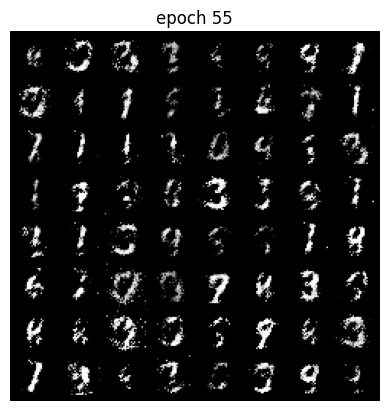

Epoch 55 of 100
Generator loss: 2.72250750, Discriminator loss: 0.56136086


118it [00:26,  4.41it/s]                                                                                               


Epoch 56 of 100
Generator loss: 2.93716506, Discriminator loss: 0.50401581


118it [00:25,  4.68it/s]                                                                                               


Epoch 57 of 100
Generator loss: 2.84225237, Discriminator loss: 0.55013036


118it [00:24,  4.73it/s]                                                                                               


Epoch 58 of 100
Generator loss: 2.89194105, Discriminator loss: 0.51540178


118it [00:27,  4.37it/s]                                                                                               


Epoch 59 of 100
Generator loss: 2.92571713, Discriminator loss: 0.49803216


118it [00:26,  4.39it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


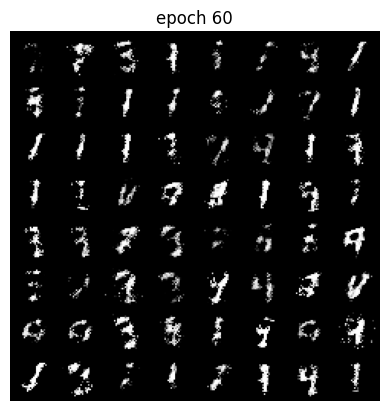

Epoch 60 of 100
Generator loss: 2.71837003, Discriminator loss: 0.59877939


118it [00:26,  4.46it/s]                                                                                               


Epoch 61 of 100
Generator loss: 2.62143216, Discriminator loss: 0.62243241


118it [00:27,  4.31it/s]                                                                                               


Epoch 62 of 100
Generator loss: 2.47752216, Discriminator loss: 0.59747513


118it [00:28,  4.12it/s]                                                                                               


Epoch 63 of 100
Generator loss: 2.51740451, Discriminator loss: 0.58175766


118it [00:28,  4.10it/s]                                                                                               


Epoch 64 of 100
Generator loss: 2.57622691, Discriminator loss: 0.59209696


118it [00:28,  4.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


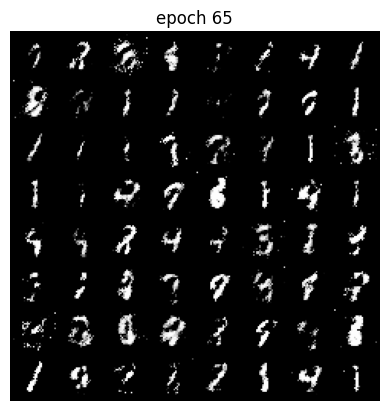

Epoch 65 of 100
Generator loss: 2.59656126, Discriminator loss: 0.58983965


118it [00:29,  4.06it/s]                                                                                               


Epoch 66 of 100
Generator loss: 2.73427697, Discriminator loss: 0.54705482


118it [00:29,  4.06it/s]                                                                                               


Epoch 67 of 100
Generator loss: 2.55535520, Discriminator loss: 0.60885241


118it [00:28,  4.14it/s]                                                                                               


Epoch 68 of 100
Generator loss: 2.48004014, Discriminator loss: 0.65168678


118it [00:28,  4.13it/s]                                                                                               


Epoch 69 of 100
Generator loss: 2.36398068, Discriminator loss: 0.67526361


118it [00:28,  4.18it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


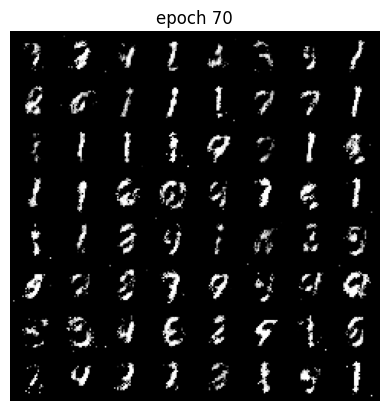

Epoch 70 of 100
Generator loss: 2.44001362, Discriminator loss: 0.66690532


118it [00:28,  4.09it/s]                                                                                               


Epoch 71 of 100
Generator loss: 2.48060462, Discriminator loss: 0.65416659


118it [00:28,  4.09it/s]                                                                                               


Epoch 72 of 100
Generator loss: 2.36979622, Discriminator loss: 0.65752747


118it [00:29,  4.01it/s]                                                                                               


Epoch 73 of 100
Generator loss: 2.40408506, Discriminator loss: 0.62949289


118it [00:28,  4.09it/s]                                                                                               


Epoch 74 of 100
Generator loss: 2.49251504, Discriminator loss: 0.62546032


118it [00:28,  4.12it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


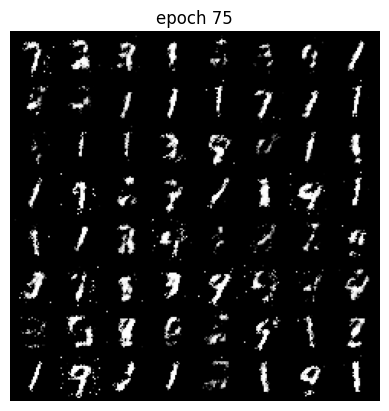

Epoch 75 of 100
Generator loss: 2.42696476, Discriminator loss: 0.67331173


118it [00:28,  4.17it/s]                                                                                               


Epoch 76 of 100
Generator loss: 2.33442947, Discriminator loss: 0.63428914


118it [00:28,  4.12it/s]                                                                                               


Epoch 77 of 100
Generator loss: 2.36985215, Discriminator loss: 0.63309639


118it [00:29,  4.05it/s]                                                                                               


Epoch 78 of 100
Generator loss: 2.36914987, Discriminator loss: 0.62781221


118it [00:28,  4.07it/s]                                                                                               


Epoch 79 of 100
Generator loss: 2.39989558, Discriminator loss: 0.65888924


118it [00:29,  4.01it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


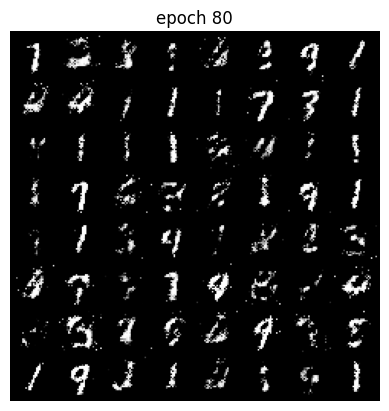

Epoch 80 of 100
Generator loss: 2.51066321, Discriminator loss: 0.65528024


118it [00:28,  4.08it/s]                                                                                               


Epoch 81 of 100
Generator loss: 2.43372804, Discriminator loss: 0.66070561


118it [00:29,  4.01it/s]                                                                                               


Epoch 82 of 100
Generator loss: 2.34224079, Discriminator loss: 0.64445160


118it [00:28,  4.07it/s]                                                                                               


Epoch 83 of 100
Generator loss: 2.34891348, Discriminator loss: 0.68194633


118it [00:28,  4.13it/s]                                                                                               


Epoch 84 of 100
Generator loss: 2.36776212, Discriminator loss: 0.70457700


118it [00:26,  4.37it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


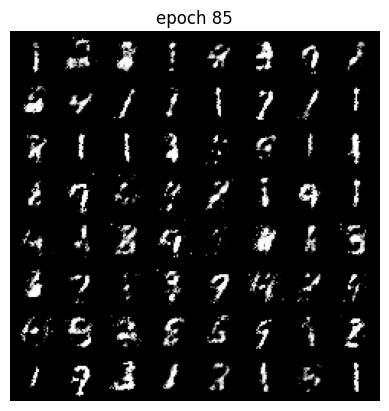

Epoch 85 of 100
Generator loss: 2.21460177, Discriminator loss: 0.71376413


118it [00:28,  4.19it/s]                                                                                               


Epoch 86 of 100
Generator loss: 2.13756721, Discriminator loss: 0.71346545


118it [00:28,  4.10it/s]                                                                                               


Epoch 87 of 100
Generator loss: 2.16931934, Discriminator loss: 0.71720142


118it [00:28,  4.14it/s]                                                                                               


Epoch 88 of 100
Generator loss: 2.07730229, Discriminator loss: 0.78547275


118it [00:28,  4.11it/s]                                                                                               


Epoch 89 of 100
Generator loss: 2.19015113, Discriminator loss: 0.70634814


118it [00:29,  3.98it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


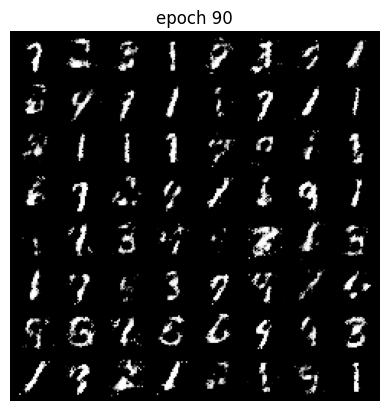

Epoch 90 of 100
Generator loss: 2.21106707, Discriminator loss: 0.72008299


118it [00:29,  4.06it/s]                                                                                               


Epoch 91 of 100
Generator loss: 2.03676708, Discriminator loss: 0.76919514


118it [00:29,  4.04it/s]                                                                                               


Epoch 92 of 100
Generator loss: 2.16073341, Discriminator loss: 0.75385911


118it [00:28,  4.10it/s]                                                                                               


Epoch 93 of 100
Generator loss: 2.16656138, Discriminator loss: 0.71281709


118it [00:29,  4.07it/s]                                                                                               


Epoch 94 of 100
Generator loss: 2.08958281, Discriminator loss: 0.73839949


118it [00:29,  4.00it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


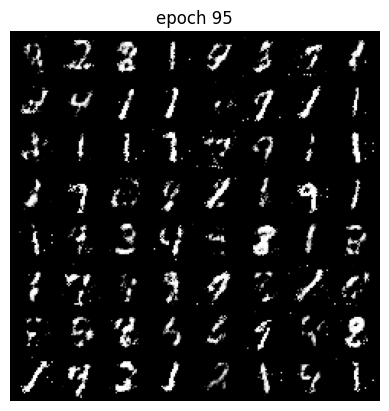

Epoch 95 of 100
Generator loss: 2.14404529, Discriminator loss: 0.71512717


118it [00:27,  4.22it/s]                                                                                               


Epoch 96 of 100
Generator loss: 2.08866208, Discriminator loss: 0.75417387


118it [00:27,  4.33it/s]                                                                                               


Epoch 97 of 100
Generator loss: 2.01469442, Discriminator loss: 0.75418149


118it [00:26,  4.45it/s]                                                                                               


Epoch 98 of 100
Generator loss: 1.96620895, Discriminator loss: 0.79086783


118it [00:26,  4.53it/s]                                                                                               


Epoch 99 of 100
Generator loss: 1.96370960, Discriminator loss: 0.77781114


118it [00:26,  4.40it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


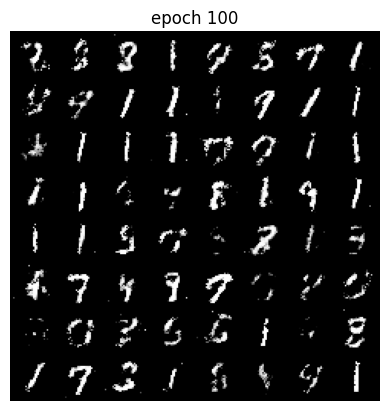

Epoch 100 of 100
Generator loss: 2.07466949, Discriminator loss: 0.79972810


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    return criterion(output, true_label)
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########         
        ## Training discriminator
        # Train with all-real batch
        discriminator.zero_grad()
        # Format batch
        real_data = data[0].to(device)
        b_size = real_data.size(0)
        label = label_real(b_size)
        # Forward pass real batch through discriminator
        real_data = real_data + 0.05 * torch.randn_like(real_data) # 1c
        output = discriminator(real_data)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Caclulate gradients for discriminator in backward pass

        # Train with all-fake batch
        # Generate fake image batch with generator
        fake = generator(create_noise(b_size, nz))
        fake = fake + 0.05 * torch.randn_like(fake) # 1c
        label = label_fake(b_size)
        # Classify all fake batch with discriminator
        output = discriminator(fake.detach())
        # Caclulate loss on all-fake batch
        errD_fake = criterion(output, label)

        errD = errD_real + errD_fake
        errD.backward()
        optim_d.step()

        ## Training generator
        generator.zero_grad()
        
        label = label_real(b_size) # 1a, 1c
        # label = label_fake(b_size) # 1b

        fake = generator(create_noise(b_size, nz))
        fake = fake + 0.05 * torch.randn_like(fake) # 1c
        output = discriminator(fake)
        errG = criterion(output, label)
        errG.backward()
        # Update generator
        optim_g.step()

        loss_d += errD.item()
        loss_g += errG.item()
        
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [19]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [20]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

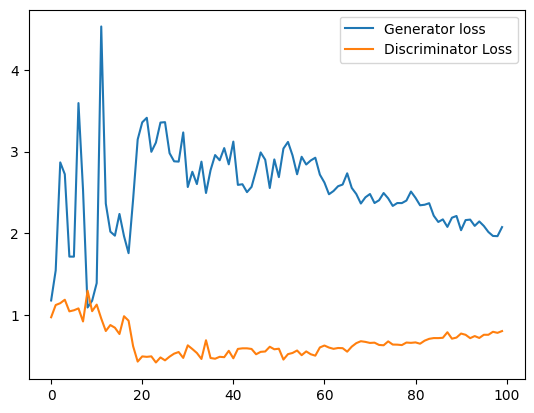

In [21]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')